In [1]:
import pandas as pd
import numpy as np

In [60]:
df = pd.read_csv("./../data/activities3.csv")
df = df.loc[df["Activity Type"]=="Run"]

In [71]:
df["Max Speed"].dtypes
print([df.select_dtypes(['number',np.number])["Distance"].isnull()])

[0      False
1      False
2      False
3      False
4      False
       ...  
916    False
917    False
918    False
919    False
921    False
Name: Distance, Length: 847, dtype: bool]


In [58]:
df = df.select_dtypes(['number',np.number]).dropna(axis=1, how="all")

In [59]:
df

,Activity ID,Elapsed Time,Distance,Max Heart Rate,Relative Effort,Athlete Weight,Elapsed Time.1,Moving Time,Distance.1,Max Speed,...,Precipitation Probability,Precipitation Type,Cloud Cover,Weather Visibility,UV Index,Weather Ozone,"<span class=""translation_missing"" title=""translation missing: en-US.lib.export.portability_exporter.activities.horton_values.flagged"">Flagged</span>","<span class=""translation_missing"" title=""translation missing: en-US.lib.export.portability_exporter.activities.horton_values.avg_elapsed_speed"">Avg Elapsed Speed</span>","<span class=""translation_missing"" title=""translation missing: en-US.lib.export.portability_exporter.activities.horton_values.dirt_distance"">Dirt Distance</span>","<span class=""translation_missing"" title=""translation missing: en-US.lib.export.portability_exporter.activities.horton_values.total_steps"">Total Steps</span>"
0,1957859098,4206,12.01,NaN,NaN,68.0,4206.0,4206.0,12013.200195,4.600000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1965955347,6025,18.27,NaN,NaN,68.0,6025.0,5990.0,18272.599609,6.100000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1966060916,2871,10.00,NaN,NaN,68.0,2871.0,2871.0,10000.000000,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1969867151,2902,9.16,190.0,125.0,68.0,2902.0,2898.0,9161.000000,5.100000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1975230210,3821,10.72,177.0,119.0,68.0,3821.0,3806.0,10727.799805,3.900000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
916,9064055920,1655,4.72,167.0,10.0,NaN,1655.0,1580.0,4724.649902,4.041992,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,2.854773,22.200001,4270.0
917,9070925061,5147,16.10,186.0,75.0,NaN,5147.0,4973.0,16105.559570,4.862012,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,3.129116,3.100000,13936.0
918,9083392593,2101,5.06,160.0,9.0,NaN,2101.0,2101.0,5060.339844,3.826000,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,2.408539,0.000000,5546.0
919,9108009296,4971,14.13,168.0,57.0,NaN,4971.0,4590.0,14133.570312,4.197949,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,2.843204,0.000000,13022.0


In [8]:
df = pd.read_csv("data/running_data.csv")
df = df[["Distance", "Moving Time"]]
df.columns = ["D", "T"]
df = df.dropna()
df

,D,T
0,9.2900,2715.0
1,9.9000,3046.0
2,5.0200,1358.0
3,10.6400,3249.0
4,21.5300,6574.0
...,...,...
431,21.0975,5885.0
432,30.0000,10070.0
433,42.1950,14641.0
434,0.2000,33.0


<AxesSubplot:xlabel='D', ylabel='T'>

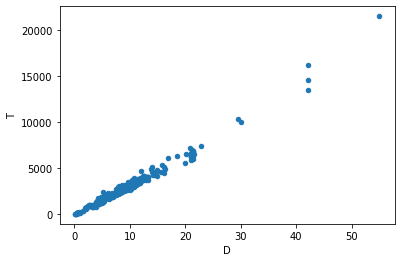

In [15]:
df.plot(x="D", y="T", kind="scatter")

<AxesSubplot:xlabel='D', ylabel='T'>

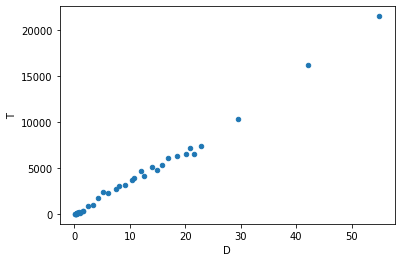

In [40]:
dd = df.copy()
def categorizer(d):
    if d < 0.1:
        return np.round(d, 3)
    elif d < 0.5:
        return np.round(d, 2)
    elif d < 2:
        return np.round(d, 1)
    else:
        return np.round(d)
dd["cat"] = dd["D"].apply(categorizer)
dd = dd.sort_values("T")
dd = dd.drop_duplicates("cat", keep="last")
dd.plot(x="D", y="T", kind="scatter")

<AxesSubplot:xlabel='D', ylabel='T'>

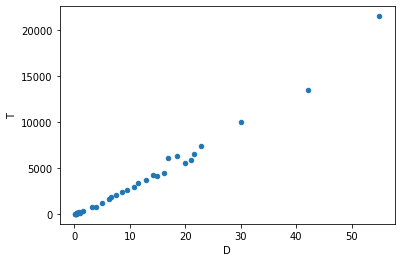

In [39]:
dd = df.copy()
def categorizer(d):
    if d < 0.2:
        return np.round(d, 3)
    elif d < 0.5:
        return np.round(d, 2)
    elif d < 1:
        return np.round(d, 1)
    else:
        return np.round(d)
dd["cat"] = dd["D"].apply(categorizer)
dd = dd.sort_values("T")
dd = dd.drop_duplicates("cat", keep="first")
dd.plot(x="D", y="T", kind="scatter")